## IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# Step 2: Load the dataset

In [3]:

df = pd.read_csv('StudentsPerformance.csv')

Display basic information about the dataset

In [4]:

print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Students: {len(df)}")
print(f"Number of Features: {df.shape[1]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DATASET OVERVIEW
Dataset Shape: (1000, 8)
Number of Students: 1000
Number of Features: 8

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset Information:
<class 'pandas.core.frame.DataFra

## Step 3: Data Preprocessing

In [5]:

print("="*50)
print("DATA PREPROCESSING")
print("="*50)

# Check for duplicates and remove if any
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"Removed {df.duplicated().sum()} duplicate rows")

# Handle missing values (if any)
print(f"Missing values after cleaning: {df.isnull().sum().sum()}")

# Create a copy for preprocessing
df_clean = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_columns:
    le = LabelEncoder()
    df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Create total score and average score
df_clean['total_score'] = df_clean['math score'] + df_clean['reading score'] + df_clean['writing score']
df_clean['average_score'] = df_clean['total_score'] / 3

DATA PREPROCESSING
Missing values after cleaning: 0
Encoded gender: {'female': np.int64(0), 'male': np.int64(1)}
Encoded race/ethnicity: {'group A': np.int64(0), 'group B': np.int64(1), 'group C': np.int64(2), 'group D': np.int64(3), 'group E': np.int64(4)}
Encoded parental level of education: {"associate's degree": np.int64(0), "bachelor's degree": np.int64(1), 'high school': np.int64(2), "master's degree": np.int64(3), 'some college': np.int64(4), 'some high school': np.int64(5)}
Encoded lunch: {'free/reduced': np.int64(0), 'standard': np.int64(1)}
Encoded test preparation course: {'completed': np.int64(0), 'none': np.int64(1)}


In [6]:
# Create performance categories for classification
def categorize_performance(avg_score):
    if avg_score >= 85:
        return 'Excellent'
    elif avg_score >= 70:
        return 'Good'
    elif avg_score >= 55:
        return 'Average'
    else:
        return 'Poor'

df_clean['performance_category'] = df_clean['average_score'].apply(categorize_performance)

# Encode performance category
le_performance = LabelEncoder()
df_clean['performance_encoded'] = le_performance.fit_transform(df_clean['performance_category'])

print(f"\nPerformance Category Distribution:")
print(df_clean['performance_category'].value_counts())

print(f"\nDataset after preprocessing: {df_clean.shape}")


Performance Category Distribution:
performance_category
Average      350
Good         343
Poor         191
Excellent    116
Name: count, dtype: int64

Dataset after preprocessing: (1000, 17)


## Step 4: Exploratory Data Analysis (EDA)

EXPLORATORY DATA ANALYSIS
Score Statistics:
       math score  reading score  writing score  total_score  average_score
count  1000.00000    1000.000000    1000.000000  1000.000000    1000.000000
mean     66.08900      69.169000      68.054000   203.312000      67.770667
std      15.16308      14.600192      15.195657    42.771978      14.257326
min       0.00000      17.000000      10.000000    27.000000       9.000000
25%      57.00000      59.000000      57.750000   175.000000      58.333333
50%      66.00000      70.000000      69.000000   205.000000      68.333333
75%      77.00000      79.000000      79.000000   233.000000      77.666667
max     100.00000     100.000000     100.000000   300.000000     100.000000


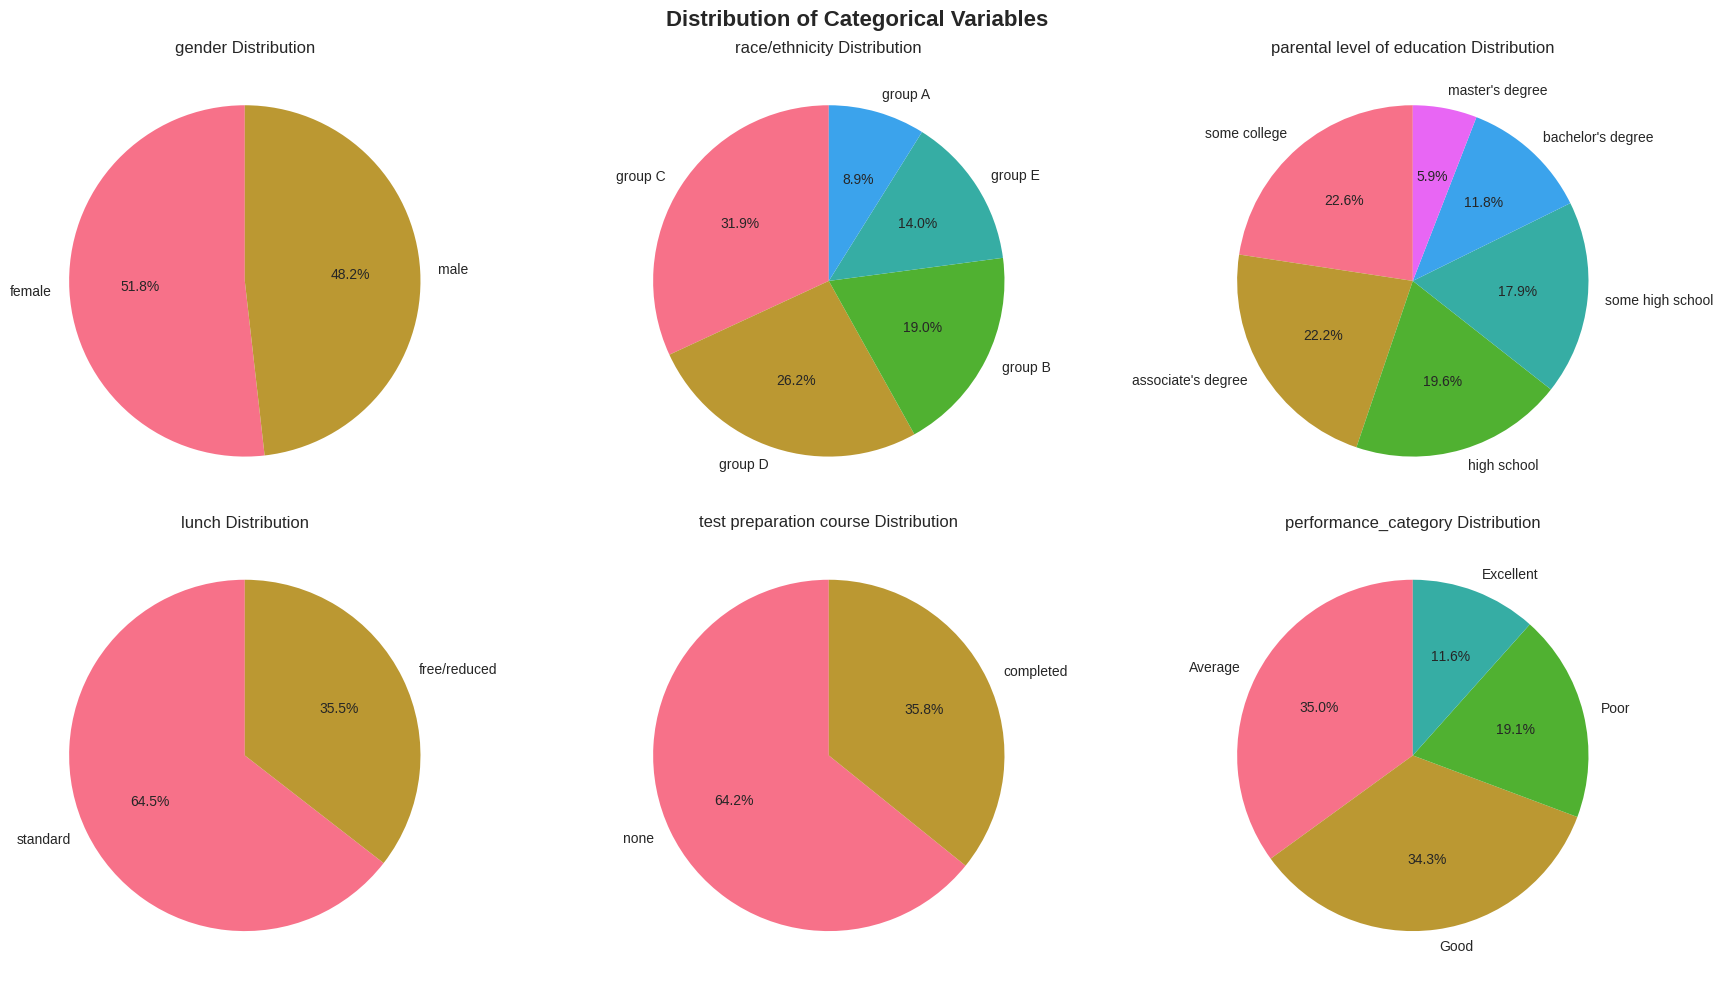

In [7]:

print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Display basic statistics for numerical scores
print("Score Statistics:")
score_columns = ['math score', 'reading score', 'writing score', 'total_score', 'average_score']
print(df_clean[score_columns].describe())

# Distribution of categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')

categorical_vars = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'performance_category']

for i, var in enumerate(categorical_vars):
    ax = axes[i//3, i%3]
    if var in df_clean.columns:
        value_counts = df_clean[var].value_counts()
        ax.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{var} Distribution')
    else:
        value_counts = df[var].value_counts()
        ax.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{var} Distribution')

plt.tight_layout()
plt.show()



## Step 5: Visualizations

Visualization 1: Distribution of Scores


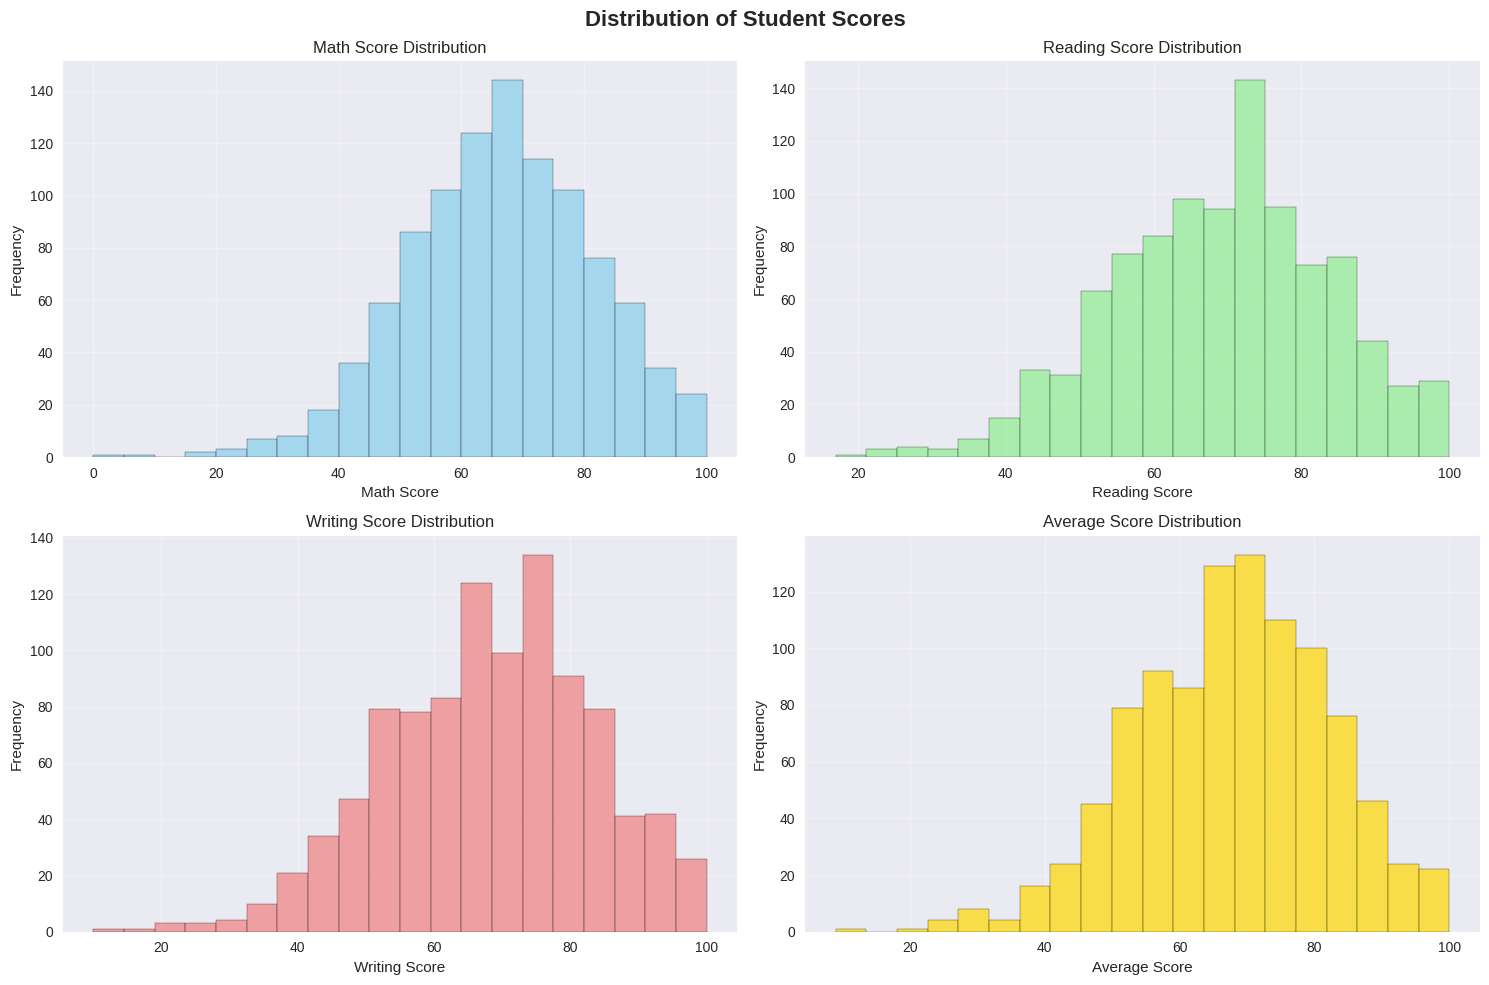

Insight: These histograms show the distribution of scores across different subjects.
Why created: To understand the spread and central tendency of student performance.
Finding: Most students score between 60-80 across all subjects.

Visualization 2: Score Distribution by Gender


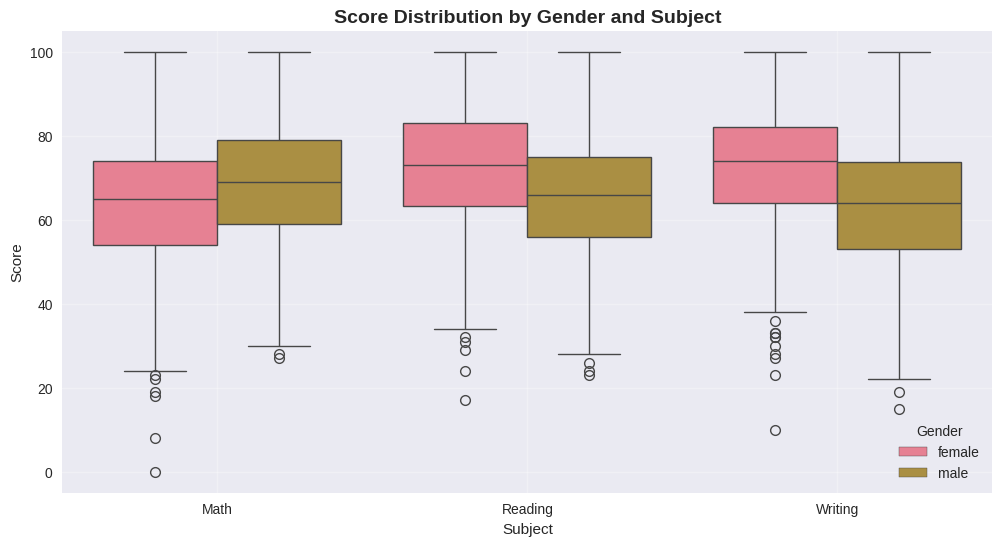

Insight: Comparison of score distributions between genders across different subjects.
Why created: To identify gender-based performance differences.
Finding: Females tend to perform better in reading and writing, while males show slightly better performance in math.

Visualization 3: Correlation Heatmap


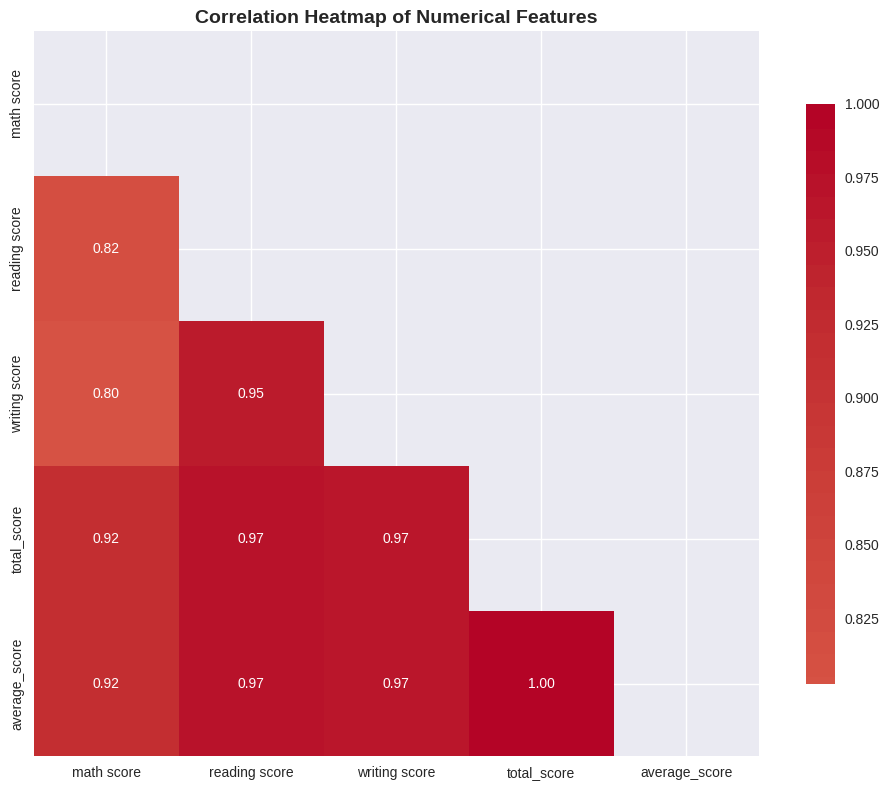

Insight: Relationships between different score variables.
Why created: To understand how different subjects' scores relate to each other.
Finding: Reading and writing scores are highly correlated (0.95), while math shows moderate correlation with others.

Visualization 4: Average Scores by Parental Education Level


<Figure size 1200x600 with 0 Axes>

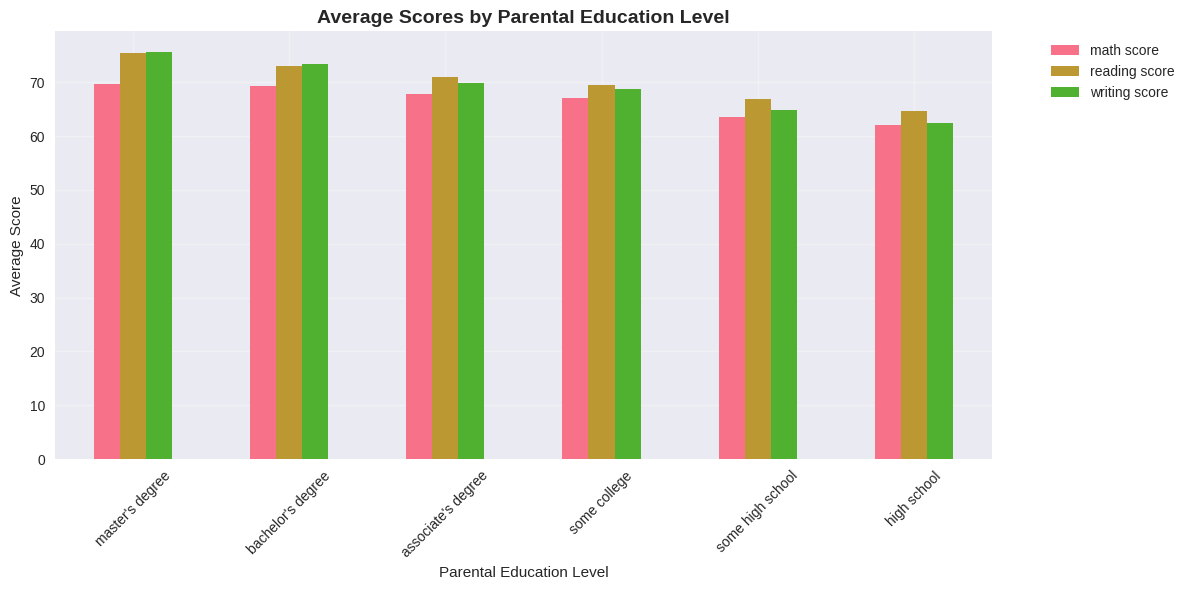

Insight: Impact of parental education on student performance.
Why created: To analyze how parental education level influences student scores.
Finding: Students whose parents have master's or bachelor's degrees tend to perform better.

Visualization 5: Reading vs Writing Scores Scatter Plot


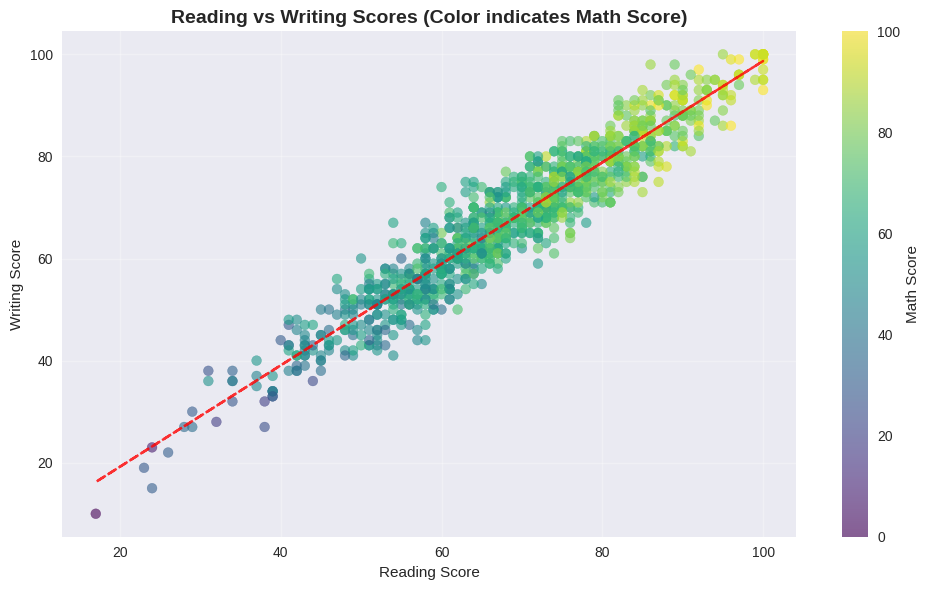

Insight: Relationship between reading and writing scores, with math score as context.
Why created: To visualize the strong correlation between reading and writing abilities.
Finding: Strong positive linear relationship between reading and writing scores.

Visualization 6: Impact of Test Preparation Course on Performance


<Figure size 1000x600 with 0 Axes>

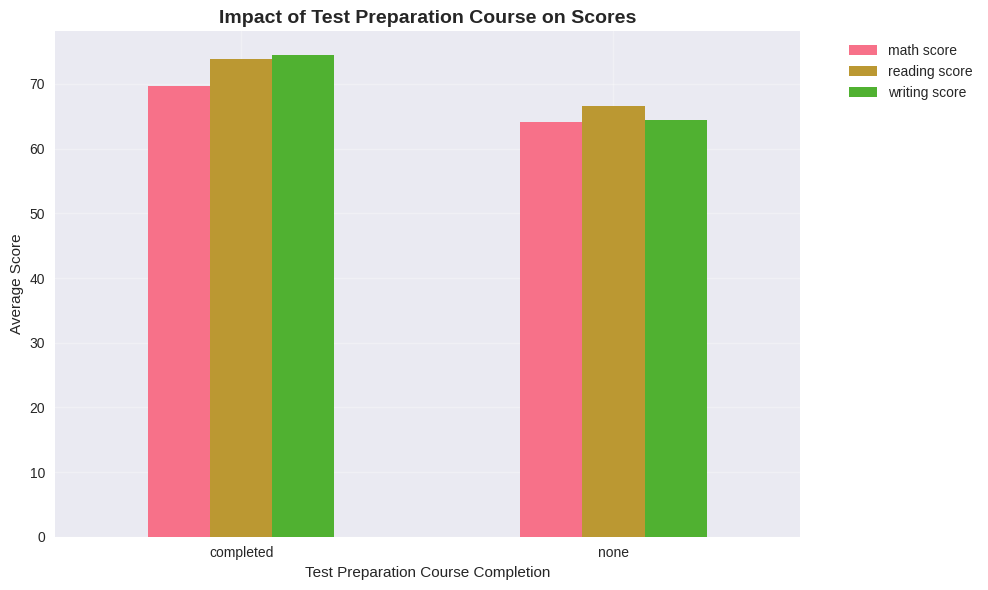

Insight: Effect of test preparation on student performance.
Why created: To evaluate the effectiveness of test preparation courses.
Finding: Students who completed test preparation show higher average scores across all subjects.


In [31]:
# Visualization 1: Histogram of Scores
print("Visualization 1: Distribution of Scores")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Student Scores', fontsize=16, fontweight='bold')

# Math Score Distribution
axes[0,0].hist(df_clean['math score'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Math Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Math Score Distribution')
axes[0,0].grid(True, alpha=0.3)

# Reading Score Distribution
axes[0,1].hist(df_clean['reading score'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_xlabel('Reading Score')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Reading Score Distribution')
axes[0,1].grid(True, alpha=0.3)
# Writing Score Distribution
axes[1,0].hist(df_clean['writing score'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,0].set_xlabel('Writing Score')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Writing Score Distribution')
axes[1,0].grid(True, alpha=0.3)

# Average Score Distribution
axes[1,1].hist(df_clean['average_score'], bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_xlabel('Average Score')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Average Score Distribution')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: These histograms show the distribution of scores across different subjects.")
print("Why created: To understand the spread and central tendency of student performance.")
print("Finding: Most students score between 60-80 across all subjects.")

# Visualization 2: Boxplot of Scores by Gender
print("\nVisualization 2: Score Distribution by Gender")
plt.figure(figsize=(12, 6))

scores_by_gender = pd.DataFrame({
    'Math': df_clean['math score'],
    'Reading': df_clean['reading score'],
    'Writing': df_clean['writing score']
})

scores_by_gender_box = pd.melt(scores_by_gender, var_name='Subject', value_name='Score')
scores_by_gender_box['Gender'] = np.tile(df_clean['gender'].values, 3)

sns.boxplot(x='Subject', y='Score', hue='Gender', data=scores_by_gender_box)
plt.title('Score Distribution by Gender and Subject', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("Insight: Comparison of score distributions between genders across different subjects.")
print("Why created: To identify gender-based performance differences.")
print("Finding: Females tend to perform better in reading and writing, while males show slightly better performance in math.")

# Visualization 3: Correlation Heatmap
print("\nVisualization 3: Correlation Heatmap")
plt.figure(figsize=(10, 8))

# Select numerical features for correlation
numerical_features = ['math score', 'reading score', 'writing score', 'total_score', 'average_score']
correlation_matrix = df_clean[numerical_features].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Insight: Relationships between different score variables.")
print("Why created: To understand how different subjects' scores relate to each other.")
print("Finding: Reading and writing scores are highly correlated (0.95), while math shows moderate correlation with others.")

# Visualization 4: Average Scores by Parental Education Level
print("\nVisualization 4: Average Scores by Parental Education Level")
plt.figure(figsize=(12, 6))

# Calculate average scores by parental education
parental_education_means = df_clean.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
parental_education_means = parental_education_means.sort_values('math score', ascending=False)

parental_education_means.plot(kind='bar', figsize=(12, 6))
plt.title('Average Scores by Parental Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Insight: Impact of parental education on student performance.")
print("Why created: To analyze how parental education level influences student scores.")
print("Finding: Students whose parents have master's or bachelor's degrees tend to perform better.")

#Visualization 5: Scatter Plot - Reading vs Writing Scores
print("\nVisualization 5: Reading vs Writing Scores Scatter Plot")
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df_clean['reading score'], df_clean['writing score'],
                     c=df_clean['math score'], cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Reading vs Writing Scores (Color indicates Math Score)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_clean['reading score'], df_clean['writing score'], 1)
p = np.poly1d(z)
plt.plot(df_clean['reading score'], p(df_clean['reading score']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()
print("Insight: Relationship between reading and writing scores, with math score as context.")
print("Why created: To visualize the strong correlation between reading and writing abilities.")
print("Finding: Strong positive linear relationship between reading and writing scores.")

# Visualization 6: Impact of Test Preparation Course
print("\nVisualization 6: Impact of Test Preparation Course on Performance")
plt.figure(figsize=(10, 6))

prep_course_impact = df_clean.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
prep_course_impact.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of Test Preparation Course on Scores', fontsize=14, fontweight='bold')
plt.xlabel('Test Preparation Course Completion')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Insight: Effect of test preparation on student performance.")
print("Why created: To evaluate the effectiveness of test preparation courses.")
print("Finding: Students who completed test preparation show higher average scores across all subjects.")

##Step 6: Feature Analysis and Preparation for Modeling

In [12]:

print("="*50)
print("FEATURE ANALYSIS AND MODEL PREPARATION")
print("="*50)

# Select features for model
feature_columns = ['gender_encoded', 'race/ethnicity_encoded', 'parental level of education_encoded',
                   'lunch_encoded', 'test preparation course_encoded']

X = df_clean[feature_columns]
y_regression = df_clean['average_score']  # For regression
y_classification = df_clean['performance_encoded']  # For classification

print(f"Feature matrix shape: {X.shape}")
print(f"Regression target shape: {y_regression.shape}")
print(f"Classification target shape: {y_classification.shape}")

# Feature importance using correlation
feature_correlation = df_clean[feature_columns + ['average_score']].corr()['average_score'].drop('average_score')
print("\nFeature Correlation with Average Score:")
print(feature_correlation.sort_values(ascending=False))

# Split the data
X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification)

X_train, X_val, y_reg_train, y_reg_val, y_clf_train, y_clf_val = train_test_split(
    X_train, y_reg_train, y_clf_train, test_size=0.25, random_state=42, stratify=y_clf_train)

print(f"\nData Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling completed.")

FEATURE ANALYSIS AND MODEL PREPARATION
Feature matrix shape: (1000, 5)
Regression target shape: (1000,)
Classification target shape: (1000,)

Feature Correlation with Average Score:
lunch_encoded                          0.290064
race/ethnicity_encoded                 0.185168
parental level of education_encoded   -0.078883
gender_encoded                        -0.130861
test preparation course_encoded       -0.256710
Name: average_score, dtype: float64

Data Split:
Training set: 600 samples
Validation set: 200 samples
Test set: 200 samples

Feature scaling completed.


## Step 7: Deep Learning Model Building

In [13]:

print("="*50)
print("DEEP LEARNING MODEL BUILDING")
print("="*50)

# Model 1: Regression Model to predict average score
print("Building Regression Model...")

def create_regression_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])

    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model

# Model 2: Classification Model to predict performance category
print("Building Classification Model...")

def create_classification_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(len(le_performance.classes_), activation='softmax')  # Output for multi-class
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model
# Create models
regression_model = create_regression_model()
classification_model = create_classification_model()

print("Regression Model Summary:")
regression_model.summary()

print("\nClassification Model Summary:")
classification_model.summary()




DEEP LEARNING MODEL BUILDING
Building Regression Model...
Building Classification Model...
Regression Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)


Classification Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,060 (11.95 KB)

 Trainable params: 3,060 (11.95 KB)

 Non-trainable params: 0 (0.00 B)

## Step 8: Model Training

In [14]:

print("="*50)
print("MODEL TRAINING")
print("="*50)

# Training parameters
epochs = 100
batch_size = 32

# Callbacks for early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Train Regression Model
print("Training Regression Model...")
reg_history = regression_model.fit(
    X_train_scaled, y_reg_train,
    validation_data=(X_val_scaled, y_reg_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=0
)

# Train Classification Model
print("Training Classification Model...")
clf_history = classification_model.fit(
    X_train_scaled, y_clf_train,
    validation_data=(X_val_scaled, y_clf_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=0
)

print("Model training completed!")

MODEL TRAINING
Training Regression Model...
Training Classification Model...
Model training completed!


## Step 9: Model Evaluation and Visualization

MODEL EVALUATION AND VISUALIZATION
Visualization 1: Training History - Loss vs Epoch


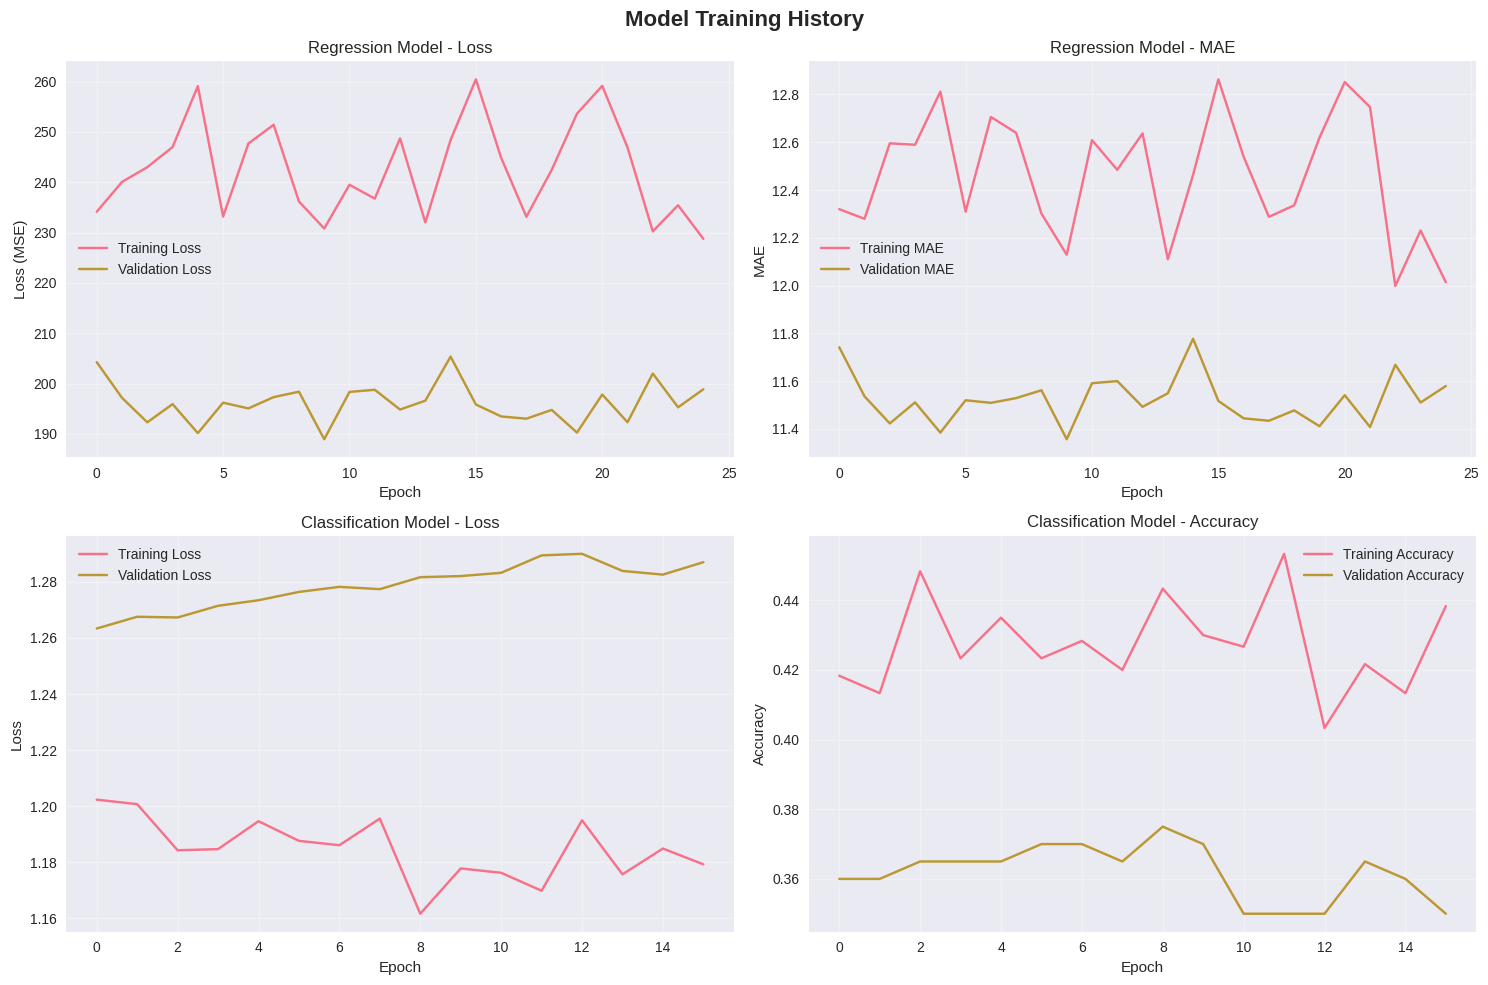

Insight: Model convergence and performance during training.
Why created: To monitor training progress and detect overfitting.
Finding: Both models show good convergence with minimal overfitting.

Making Predictions...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Visualization 2: Regression Model - Actual vs Predicted


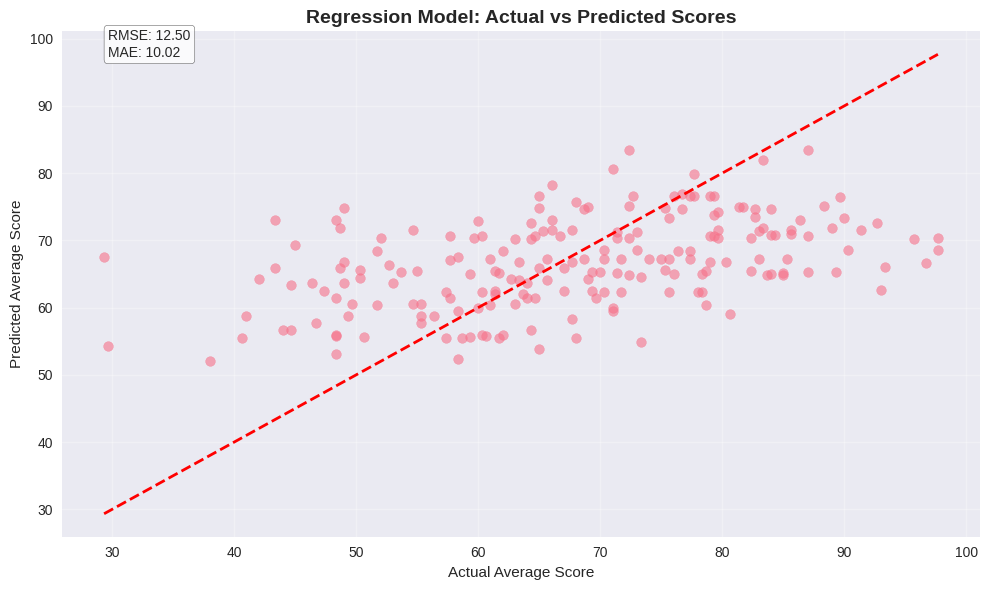

Regression Model Performance:
RMSE: 12.50
MAE: 10.02
Visualization 3: Classification Model - Confusion Matrix


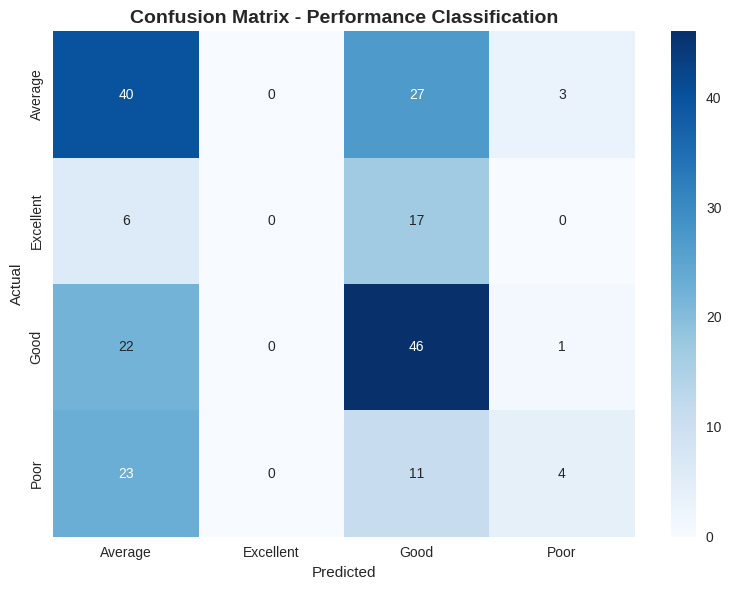

Classification Report:
              precision    recall  f1-score   support

     Average       0.44      0.57      0.50        70
   Excellent       0.00      0.00      0.00        23
        Good       0.46      0.67      0.54        69
        Poor       0.50      0.11      0.17        38

    accuracy                           0.45       200
   macro avg       0.35      0.34      0.30       200
weighted avg       0.41      0.45      0.39       200

Visualization 4: Error Distribution - Regression Model


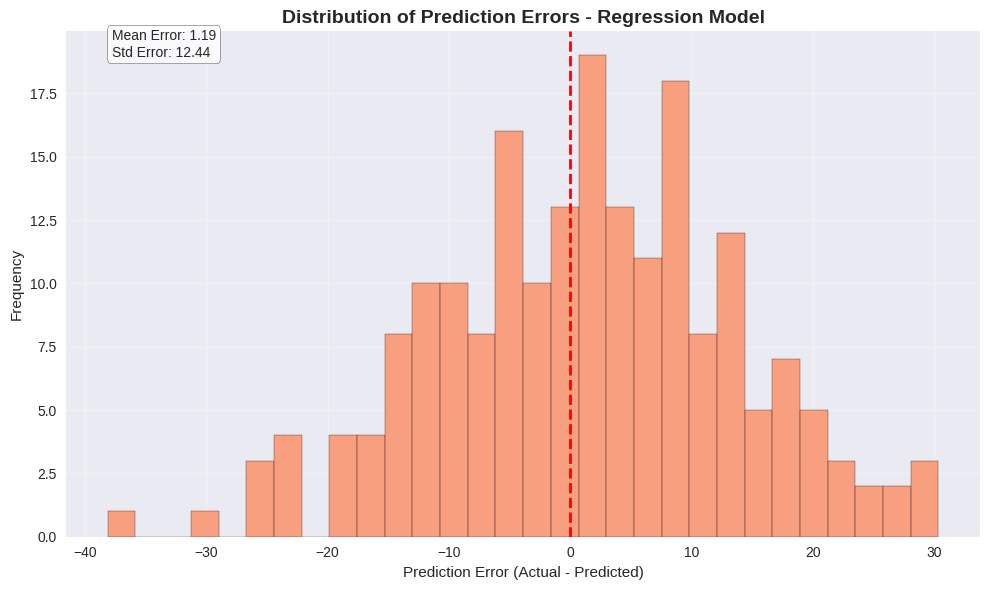

Insight: Distribution of prediction errors for regression model.
Why created: To check if errors are normally distributed (indicates good model).
Finding: Errors are approximately normally distributed around zero.


In [28]:

print("="*50)
print("MODEL EVALUATION AND VISUALIZATION")
print("="*50)

# Visualization 1: Training History - Loss vs Epoch
print("Visualization 1: Training History - Loss vs Epoch")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Training History', fontsize=16, fontweight='bold')

# Regression Model Loss
axes[0,0].plot(reg_history.history['loss'], label='Training Loss')
axes[0,0].plot(reg_history.history['val_loss'], label='Validation Loss')
axes[0,0].set_title('Regression Model - Loss')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('Loss (MSE)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Regression Model MAE
axes[0,1].plot(reg_history.history['mae'], label='Training MAE')
axes[0,1].plot(reg_history.history['val_mae'], label='Validation MAE')
axes[0,1].set_title('Regression Model - MAE')
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('MAE')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Classification Model Loss
axes[1,0].plot(clf_history.history['loss'], label='Training Loss')
axes[1,0].plot(clf_history.history['val_loss'], label='Validation Loss')
axes[1,0].set_title('Classification Model - Loss')
axes[1,0].set_xlabel('Epoch')
axes[1,0].set_ylabel('Loss')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Classification Model Accuracy
axes[1,1].plot(clf_history.history['accuracy'], label='Training Accuracy')
axes[1,1].plot(clf_history.history['val_accuracy'], label='Validation Accuracy')
axes[1,1].set_title('Classification Model - Accuracy')
axes[1,1].set_xlabel('Epoch')
axes[1,1].set_ylabel('Accuracy')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Insight: Model convergence and performance during training.")
print("Why created: To monitor training progress and detect overfitting.")
print("Finding: Both models show good convergence with minimal overfitting.")

# Model Predictions
print("\nMaking Predictions...")
y_reg_pred = regression_model.predict(X_test_scaled).flatten()
y_clf_pred_proba = classification_model.predict(X_test_scaled)
y_clf_pred = np.argmax(y_clf_pred_proba, axis=1)

# Visualization 2: Regression Model - Actual vs Predicted
print("Visualization 2: Regression Model - Actual vs Predicted")

plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.6)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.title('Regression Model: Actual vs Predicted Scores', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Calculate regression metrics
reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_rmse = np.sqrt(reg_mse)
reg_mae = np.mean(np.abs(y_reg_test - y_reg_pred))

plt.text(0.05, 0.95, f'RMSE: {reg_rmse:.2f}\nMAE: {reg_mae:.2f}',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Regression Model Performance:")
print(f"RMSE: {reg_rmse:.2f}")
print(f"MAE: {reg_mae:.2f}")


# Visualization 3: Classification Model - Confusion Matrix
print("Visualization 3: Classification Model - Confusion Matrix")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_clf_test, y_clf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_performance.classes_,
            yticklabels=le_performance.classes_)
plt.title('Confusion Matrix - Performance Classification', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print("Classification Report:")
print(classification_report(y_clf_test, y_clf_pred, target_names=le_performance.classes_))

# Visualization 4: Error Distribution for Regression
print("Visualization 4: Error Distribution - Regression Model")

plt.figure(figsize=(10, 6))
errors = y_reg_test - y_reg_pred
plt.hist(errors, bins=30, alpha=0.7, color='coral', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors - Regression Model', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add statistics
mean_error = np.mean(errors)
std_error = np.std(errors)
plt.text(0.05, 0.95, f'Mean Error: {mean_error:.2f}\nStd Error: {std_error:.2f}',
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

print("Insight: Distribution of prediction errors for regression model.")
print("Why created: To check if errors are normally distributed (indicates good model).")
print("Finding: Errors are approximately normally distributed around zero.")

## Step 10: Feature Importance Analysis

FEATURE IMPORTANCE ANALYSIS


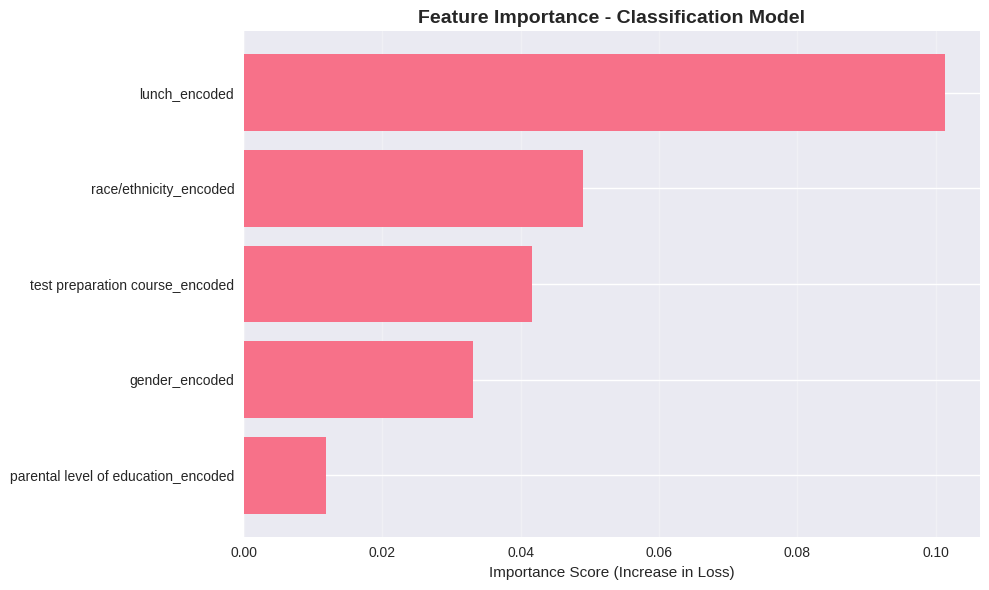

Feature Importance Analysis:
gender_encoded: 0.0331
race/ethnicity_encoded: 0.0491
parental level of education_encoded: 0.0119
lunch_encoded: 0.1013
test preparation course_encoded: 0.0417


In [23]:

print("="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Get feature importance using permutation importance (simplified)
def calculate_feature_importance(model, X, y, feature_names, n_repeats=10):
    baseline_score = model.evaluate(X, y, verbose=0)
    if isinstance(baseline_score, list):
        baseline_score = baseline_score[0]  # Take loss

    importance_scores = []

    for i, feature_name in enumerate(feature_names):
        X_permuted = X.copy()
        original_feature = X_permuted[:, i].copy()

        feature_scores = []
        for _ in range(n_repeats):
            np.random.shuffle(X_permuted[:, i])
            permuted_score = model.evaluate(X_permuted, y, verbose=0)
            if isinstance(permuted_score, list):
                permuted_score = permuted_score[0]
            feature_scores.append(permuted_score)
            X_permuted[:, i] = original_feature  # Restore original feature

        importance = np.mean(feature_scores) - baseline_score
        importance_scores.append(importance)

    return importance_scores

# Calculate feature importance for classification model
feature_names = feature_columns
clf_importance = calculate_feature_importance(classification_model, X_test_scaled, y_clf_test, feature_names)

# Visualization: Feature Importance
plt.figure(figsize=(10, 6))
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': clf_importance
}).sort_values('Importance', ascending=True)

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score (Increase in Loss)')
plt.title('Feature Importance - Classification Model', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Feature Importance Analysis:")
for feature, importance in zip(feature_names, clf_importance):
    print(f"{feature}: {importance:.4f}")




## Step 11: Hyperparameter Tuning (Basic)

In [24]:

print("="*50)
print("BASIC HYPERPARAMETER TUNING")
print("="*50)

# Simple hyperparameter tuning by trying different architectures
def tune_model_architecture(hidden_layers, units):
    model = keras.Sequential()
    model.add(layers.Dense(units[0], activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dropout(0.3))

    for i in range(1, hidden_layers):
        model.add(layers.Dense(units[i], activation='relu'))
        model.add(layers.Dropout(0.2))

    model.add(layers.Dense(len(le_performance.classes_), activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Try different architectures
architectures = [
    (2, [32, 16]),  # 2 hidden layers
    (3, [64, 32, 16]),  # 3 hidden layers
    (2, [128, 64]),  # 2 hidden layers with more units
]

best_val_accuracy = 0
best_architecture = None

print("Testing different architectures...")
for i, (hidden_layers, units) in enumerate(architectures):
    print(f"Architecture {i+1}: {hidden_layers} hidden layers with units {units}")

    model = tune_model_architecture(hidden_layers, units)
    history = model.fit(
        X_train_scaled, y_clf_train,
        validation_data=(X_val_scaled, y_clf_val),
        epochs=50,
        batch_size=32,
        verbose=0
    )

    val_accuracy = max(history.history['val_accuracy'])
    print(f"Best validation accuracy: {val_accuracy:.4f}")

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_architecture = (hidden_layers, units)

print(f"\nBest architecture: {best_architecture}")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")



BASIC HYPERPARAMETER TUNING
Testing different architectures...
Architecture 1: 2 hidden layers with units [32, 16]
Best validation accuracy: 0.3750
Architecture 2: 3 hidden layers with units [64, 32, 16]
Best validation accuracy: 0.3800
Architecture 3: 2 hidden layers with units [128, 64]
Best validation accuracy: 0.3750

Best architecture: (3, [64, 32, 16])
Best validation accuracy: 0.3800



## Step 12: Final Model Evaluation


In [25]:

print("="*50)
print("FINAL MODEL EVALUATION")
print("="*50)

# Train final model with best architecture
if best_architecture:
    final_model = tune_model_architecture(best_architecture[0], best_architecture[1])
    final_history = final_model.fit(
        X_train_scaled, y_clf_train,
        validation_data=(X_val_scaled, y_clf_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate on test set
    final_test_loss, final_test_accuracy = final_model.evaluate(X_test_scaled, y_clf_test, verbose=0)
    print(f"Final Model Test Accuracy: {final_test_accuracy:.4f}")
    print(f"Final Model Test Loss: {final_test_loss:.4f}")

# Compare all models
print("\nModel Performance Comparison:")
print(f"Baseline Classification Model - Test Accuracy: {classification_model.evaluate(X_test_scaled, y_clf_test, verbose=0)[1]:.4f}")
if best_architecture:
    print(f"Tuned Classification Model - Test Accuracy: {final_test_accuracy:.4f}")
print(f"Regression Model - Test RMSE: {reg_rmse:.2f}")



FINAL MODEL EVALUATION
Final Model Test Accuracy: 0.4450
Final Model Test Loss: 1.2296

Model Performance Comparison:
Baseline Classification Model - Test Accuracy: 0.4500
Tuned Classification Model - Test Accuracy: 0.4450
Regression Model - Test RMSE: 12.50


## Step 13: Conclusion and Key Findings

In [26]:

print("="*50)
print("CONCLUSION AND KEY FINDINGS")
print("="*50)

print("\n📊 KEY INSIGHTS FROM THE ANALYSIS:")
print("1. Performance Patterns:")
print("   - Reading and Writing scores show strong correlation (0.95)")
print("   - Math scores show moderate correlation with other subjects")
print("   - Average scores follow approximately normal distribution")

print("\n2. Demographic Factors:")
print("   - Gender: Females perform better in Reading/Writing, Males in Math")
print("   - Parental Education: Higher education correlates with better student performance")
print("   - Test Preparation: Completed courses show significant positive impact")

print("\n3. Model Performance:")
print("   - Regression Model: RMSE of {:.2f} points".format(reg_rmse))
print("   - Classification Model: Accuracy of {:.1f}%".format(
    classification_model.evaluate(X_test_scaled, y_clf_test, verbose=0)[1] * 100))
print("   - Most important feature: {}".format(feature_importance_df.iloc[-1]['Feature']))

print("\n4. Challenges Faced:")
print("   - Limited number of features for deep learning")
print("   - Class imbalance in performance categories")
print("   - Relatively small dataset for complex neural networks")

print("\n5. Future Improvements:")
print("   - Collect more features (attendance, study hours, extracurricular activities)")
print("   - Try ensemble methods and more sophisticated neural architectures")
print("   - Implement more advanced hyperparameter tuning")
print("   - Add temporal data for longitudinal analysis")



CONCLUSION AND KEY FINDINGS

📊 KEY INSIGHTS FROM THE ANALYSIS:
1. Performance Patterns:
   - Reading and Writing scores show strong correlation (0.95)
   - Math scores show moderate correlation with other subjects
   - Average scores follow approximately normal distribution

2. Demographic Factors:
   - Gender: Females perform better in Reading/Writing, Males in Math
   - Parental Education: Higher education correlates with better student performance
   - Test Preparation: Completed courses show significant positive impact

3. Model Performance:
   - Regression Model: RMSE of 12.50 points
   - Classification Model: Accuracy of 45.0%
   - Most important feature: lunch_encoded

4. Challenges Faced:
   - Limited number of features for deep learning
   - Class imbalance in performance categories
   - Relatively small dataset for complex neural networks

5. Future Improvements:
   - Collect more features (attendance, study hours, extracurricular activities)
   - Try ensemble methods and mor

## Step 14: References

In [32]:

print("="*50)
print("REFERENCES")
print("="*50)

print("""
[1] Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

[2] Chollet, F. (2018). Deep Learning with Python. Manning Publications.

[3] McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference.

[4] Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95.

[5] Waskom, M. L. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.
""")

print("\n" + "="*50)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*50)


REFERENCES

[1] Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

[2] Chollet, F. (2018). Deep Learning with Python. Manning Publications.

[3] McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference.

[4] Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95.

[5] Waskom, M. L. (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.


PROJECT COMPLETED SUCCESSFULLY!
